In [16]:
from fastai.vision import *
import pandas as pd
from PIL import Image
from matplotlib.cbook import flatten
from matplotlib.pyplot import imshow

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## show train images

Let's start from the basics and show train images.

### order of files

In what order `ls` sorts files on `Mac OS`? We may see that `Mac OS`, `ls` and `glob` list files in completely different order:

- it looks like that `ls` and `sorted` sort files in `ascii` order. `Mac OS` is different and we don't really care;
- what about `glob`? it seems `glob` lists files as they are stored in a file system - compare with 

In [4]:
path = Path.home() / 'data/db_kaggle'

In [5]:
path_train = path / 'train'

In [76]:
path_valid = path / 'test'

In [6]:
path_train

PosixPath('/Users/ilyarudyak/data/db_kaggle/train')

In [7]:
! ls /Users/ilyarudyak/data/db_kaggle/train | head

000bec180eb18c7604dcecc8fe0dba07.jpg
001513dfcb2ffafc82cccf4d8bbaba97.jpg
001cdf01b096e06d78e9e5112d419397.jpg
00214f311d5d2247d5dfe4fe24b2303d.jpg
0021f9ceb3235effd7fcde7f7538ed62.jpg
002211c81b498ef88e1b40b9abf84e1d.jpg
00290d3e1fdd27226ba27a8ce248ce85.jpg
002a283a315af96eaea0e28e7163b21b.jpg
003df8b8a8b05244b1d920bb6cf451f9.jpg
0042188c895a2f14ef64a918ed9c7b64.jpg


In [15]:
! ls -f /Users/ilyarudyak/data/db_kaggle/train | head

.
..
84accc2dc9f5bb3ebee89fe1bf23639c.jpg
14cffe576239620f1733dfe487dbaa6f.jpg
cc93915e06bc55626a02af95006a48c2.jpg
6f9bac41b5be5ee6baecc9e7ef8f2c2a.jpg
64dd586a1d08937d20618233df2e5dbc.jpg
2c1b06c76751d8b9f9ff943cd693cfca.jpg
114524d11fe49af5be43897233a4f65e.jpg
efec2f66576df7aa036d77ad1fafc8bf.jpg


In [10]:
list(path_train.glob('*'))[:5]

[PosixPath('/Users/ilyarudyak/data/db_kaggle/train/84accc2dc9f5bb3ebee89fe1bf23639c.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/14cffe576239620f1733dfe487dbaa6f.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/cc93915e06bc55626a02af95006a48c2.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/6f9bac41b5be5ee6baecc9e7ef8f2c2a.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/64dd586a1d08937d20618233df2e5dbc.jpg')]

In [11]:
sorted(list(path_train.glob('*')))[:5]

[PosixPath('/Users/ilyarudyak/data/db_kaggle/train/000bec180eb18c7604dcecc8fe0dba07.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/001cdf01b096e06d78e9e5112d419397.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/00214f311d5d2247d5dfe4fe24b2303d.jpg'),
 PosixPath('/Users/ilyarudyak/data/db_kaggle/train/0021f9ceb3235effd7fcde7f7538ed62.jpg')]

### number of files

Let's fix the number of files for the future use.

In [40]:
len(path_train.ls())

10222

In [41]:
! ls /Users/ilyarudyak/data/db_kaggle/train | wc -l

   10222


### show train images

Let's first show with standard methods.

In [17]:
dogs = sorted(list(path_train.glob('*')))[:8]

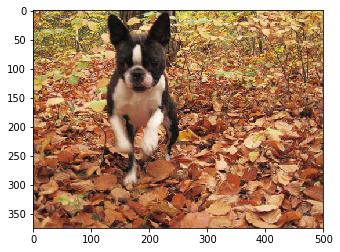

In [18]:
filename = dogs[0]
img = Image.open(filename)
imshow(img);

In [34]:
def show_images_stand(image_list, grid=(2, 4), figsize=(16,8)):
    nrows, ncols = grid
    _, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize);
    counter = 0
    for i in range(nrows):
        for j in range(ncols):
            img = Image.open(image_list[counter])
            counter += 1
            img = img.resize((224, 224))
            ax[i, j].axis('off')
            ax[i, j].imshow(img)

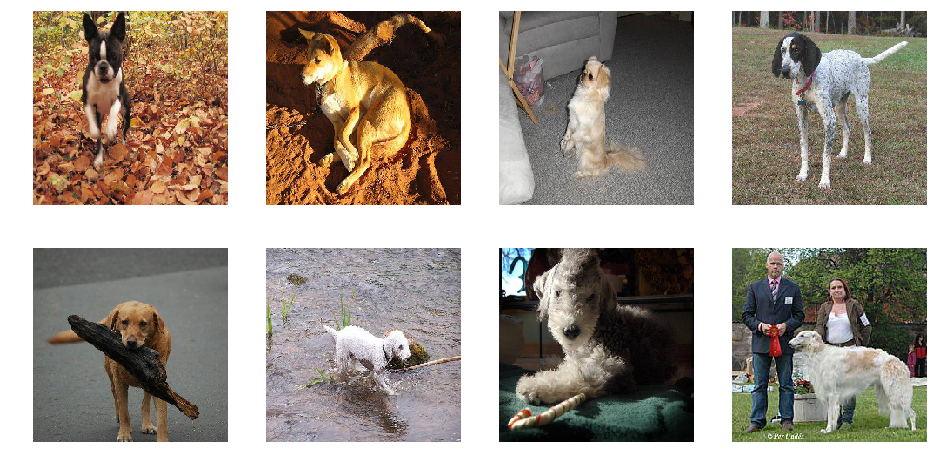

In [35]:
show_images_stand(dogs)

In [38]:
def show_images_fastai(image_list, grid=(2, 4), figsize=(16, 8)):
    nrows, ncols = grid
    _,axs = plt.subplots(nrows, ncols, figsize=figsize)
    for i,ax in enumerate(flatten(axs)): 
        img = open_image(image_list[i])
        img.show(ax=ax)

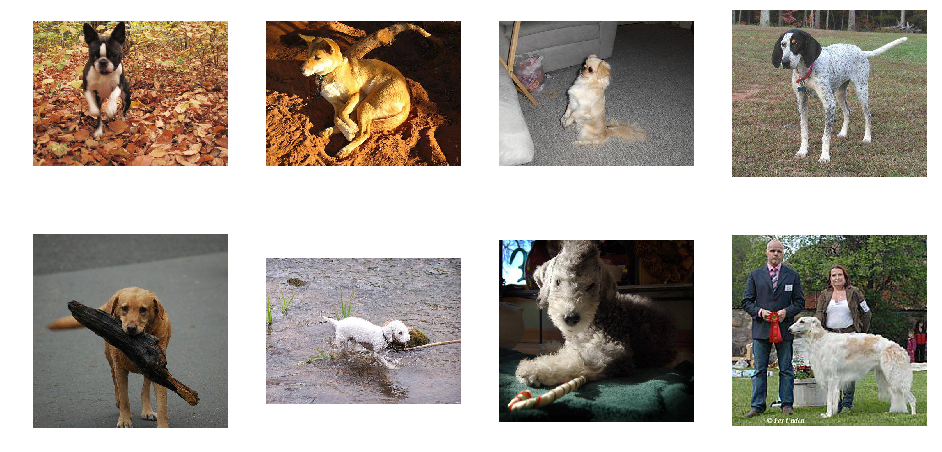

In [39]:
show_images_fastai(dogs)

## load data

So in `v1` of this notebook we managed to get data in `DataBunch` but it's not quite clear how  to get unshuffled data or filenames. Let's try to solve this.

In [42]:
path

PosixPath('/Users/ilyarudyak/data/db_kaggle')

In [61]:
torch.manual_seed(42)
data = ImageDataBunch.from_csv(path,
                               csv_labels='labels.csv',
                               ds_tfms=get_transforms(),
                               size=224,
                               bs=9,
                               num_workers=0)

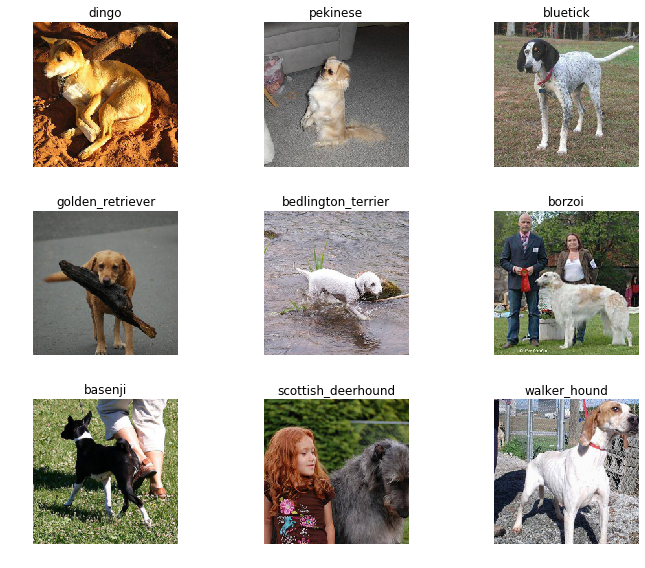

In [84]:
data.show_batch(rows=3, figsize=(10,8), ds_type=DatasetType.Fix)

How can we get list of files? We'll use `data.train_ds.items`.

In [85]:
data.train_ds.items[:5]

array(['/Users/ilyarudyak/data/db_kaggle/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/001cdf01b096e06d78e9e5112d419397.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/002211c81b498ef88e1b40b9abf84e1d.jpg'], dtype='<U76')

In [94]:
data.valid_ds.items[:5]

array(['/Users/ilyarudyak/data/db_kaggle/train/a930ca18e5688b01f1cb223383faf9bf.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/5dbe2651396ccc76532a97e5f20a872b.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/2d238157ee1f8d2c02ca68668d864ae0.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/5c8c894495971a65f0a179bc4c0ca0bb.jpg',
       '/Users/ilyarudyak/data/db_kaggle/train/6e61626e3af3ab86323ffdb883086d71.jpg'], dtype='<U76')

In [87]:
len(data.train_ds.items), len(data.train_ds)

(8178, 8178)

In [88]:
len(data.valid_ds.items), len(data.valid_ds)

(2044, 2044)

In [67]:
8178 + 2044

10222

In [91]:
len(data.train_dl) * 9, len(data.valid_dl) * 9

(8172, 2052)

That's interesting - the number of files is exactly the same but what about data augmentation? And why `valid_loader` is bigger than `valid` dataset?

Let's also try to sort those items. We see that this list is actually already sorted (but not validation set). We also see the reason behind the difference in images above. It seems that `000bec180eb18c7604dcecc8fe0dba07.jpg` is in `valid` set.

In [86]:
sorted(data.train_ds.items)[:5]

['/Users/ilyarudyak/data/db_kaggle/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/002211c81b498ef88e1b40b9abf84e1d.jpg']

In [93]:
sorted(data.valid_ds.items)[:5]

['/Users/ilyarudyak/data/db_kaggle/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/004396df1acd0f1247b740ca2b14616e.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/006cc3ddb9dc1bd827479569fcdc52dc.jpg',
 '/Users/ilyarudyak/data/db_kaggle/train/0075dc49dab4024d12fafe67074d8a81.jpg']

So the only question left - where's augmentation? Also we have to understand the source code of the package in order to use it. This is going to be the next step.